## InfraSim Demo

In this demonstration, we will do the following:

- Construct an InfraSim.Thames model
- Run the model
- Look at the results
- Create simple plots of flows and storage volumes

In [1]:
import sys
sys.path.append('../')
from infrasim.thames import *
from infrasim.plotting import *

# Define file paths
nodes       = '../data/demo/spatial/nodes-demo.shp'
edges       = '../data/demo/spatial/edges-demo.shp'
flows       = '../data/demo/csv/demo-flows.csv'

# initiate
thames = Model(nodes,edges,flows,timesteps=1000,super_source=True,super_sink=True)

# build
thames.build()

# run
try:
    thames.run(pprint=False)    #pprint will print to console
except:
    thames.debug()

Using license file /Users/amanmajid/gurobi.lic
Academic license - for non-commercial use only


In [2]:
# Get results of flows along each arc
thames.results_arcflows.head(5)

,Start,End,Commodity,Day,Month,Year,Timestep,Value
0,SWOX GW,SWOX,water,1.0,1,2020.0,1,0.0000
1,Upper Thames,Farmoor,water,1.0,1,2020.0,1,264.3083
2,Farmoor,SWOX,water,1.0,1,2020.0,1,264.3083
3,Gatehampton GW,J2,water,1.0,1,2020.0,1,0.0000
4,Upper Thames,J1,water,1.0,1,2020.0,1,7708.6837


In [3]:
# Get results of storage volumes
thames.results_storage_volumes.head(5)

,Node,Commodity,Day,Month,Year,Timestep,Value
0,Farmoor,water,1.0,1,2020.0,1,13822.0
1,London Storages,water,1.0,1,2020.0,1,202828.0
36,Farmoor,water,2.0,1,2020.0,2,13822.0
37,London Storages,water,2.0,1,2020.0,2,202828.0
72,Farmoor,water,3.0,1,2020.0,3,13822.0


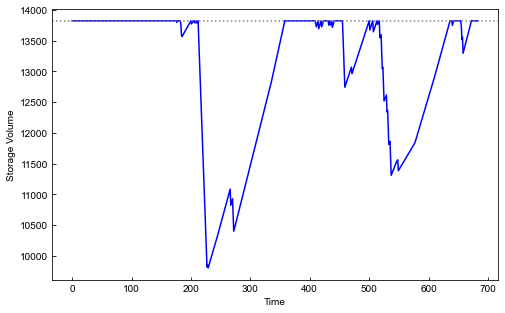

In [4]:
# plot storage volume of Farmoor reservoir
plot_storage_volume(thames.results_storage_volumes,node='Farmoor',figsize=(8,5))

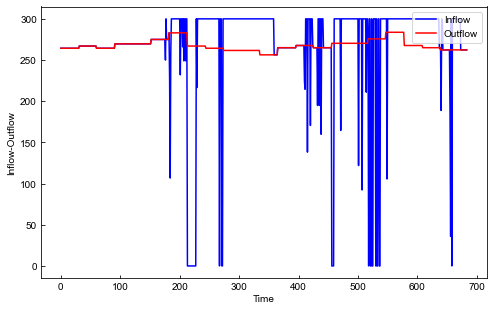

In [5]:
# plot inflow and outflow at Farmoor reservoir
plot_inflow_outflow(thames.results_arcflows,node='Farmoor',figsize=(8,5))